Looking at polynominal terms for rotation parameters  
Should there be  constant term?  
Should it be the default?  
That is  
`Polynominal([c, 0.0])` instead of `Polynomial([0.0, m])`

In [1]:
import numpy as np
import cmm_error_map.data_cmpts as dc
import cmm_error_map.config as cf
from cmm_error_map.mpl_2014.ballplate_plots import single_grid_plot


In [2]:
model_coeffs = {
    "Txx": [0.0, 0.0],
    "Txy": [0.0, 0.0],
    "Txz": [0.0, 0.0],
    "Tyx": [0.0, 0.0],
    "Tyy": [0.0, 0.0],
    "Tyz": [0.0, 0.0],
    "Tzx": [0.0, 0.0],
    "Tzy": [0.0, 0.0],
    "Tzz": [0.0, 0.0],
    "Rxx": [0.0, 0.0],
    "Rxy": [0.0, 0.0],
    "Rxz": [0.0, 0.0],
    "Ryx": [0.0, 0.0],
    "Ryy": [0.0, 0.0],
    "Ryz": [0.0, 0.0],
    "Rzx": [0.0, 0.0],
    "Rzy": [0.0, 0.0],
    "Rzz": [0.0, 0.0],
    "Wxy": [0.0, 0.0],
    "Wxz": [0.0, 0.0],
    "Wyz": [0.0, 0.0],
}

In [3]:
x0, y0, z0 = 250.0, 50.0, 50.0
# XY plane
transform_mat_xy = dc.matrix_from_vectors([x0, y0, z0], [0.0, 0.0, 0.0])
xt, yt, zt = 0.0, 0.0, -250.0
prb_xy = dc.Probe(title="P0", name="p0", length=np.array([xt, yt, zt]))
mmt_xy = dc.Measurement(
    title="Plate XY",
    name="mmt_00",
    artefact=cf.artefact_models["KOBA 0620"],
    transform_mat=transform_mat_xy,
    probe=prb_xy,
    cmm_nominal=None,
    cmm_dev=None,
    mmt_nominal=None,
    mmt_dev=None,
)


In [4]:
model_coeffs["Rxz"] = [0.0, 1e-8]
mmt_xy.recalculate(model_coeffs, dc.pmm_866.cmm_model)

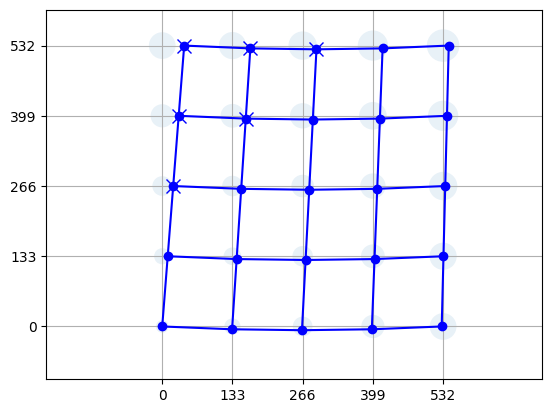

In [5]:
single_grid_plot(mmt_xy.mmt_dev.T, 10000);

In [6]:
model_coeffs["Rxz"] = [1e-6, 0.0]
mmt_xy.recalculate(model_coeffs, dc.pmm_866.cmm_model)

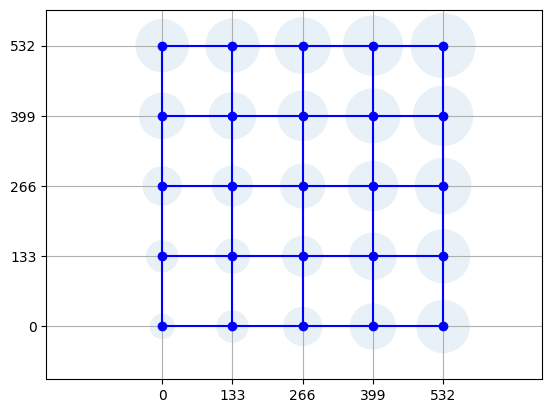

In [7]:
single_grid_plot(mmt_xy.mmt_dev.T, 20000);

In [8]:
mmt_xy.mmt_nominal[:, -1]

array([532., 532.,   0.])

In [9]:
mmt_xy.mmt_dev[:, 0]

array([2.84217094e-14, 0.00000000e+00, 0.00000000e+00])

In [10]:
mmt_xy.cmm_nominal[:, 4]

array([782.,  50.,  50.])

In [11]:
mmt_xy.cmm_dev[:, 4]

array([ 5.00e-05, -7.82e-04,  0.00e+00])

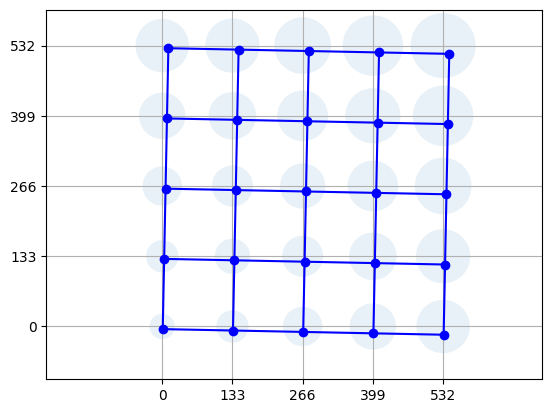

In [12]:
single_grid_plot(mmt_xy.cmm_dev.T, 20000);

In [26]:
# silly  example
x0, y0, z0 = 250.0, 250.0, 250.0
transform_mat_xy = dc.matrix_from_vectors([x0, y0, z0], [20.0, 30.0, -90.0])
xt, yt, zt = 100.0, 100.0, -250.0
prb_xy = dc.Probe(title="P0", name="p0", length=np.array([xt, yt, zt]))
mmt_xy = dc.Measurement(
    title="Plate XY",
    name="mmt_00",
    artefact=cf.artefact_models["KOBA 0620"],
    transform_mat=transform_mat_xy,
    probe=prb_xy,
    cmm_nominal=None,
    cmm_dev=None,
    mmt_nominal=None,
    mmt_dev=None,
)

In [27]:
for p in model_coeffs:
    if p in ["Rxx", "Rxy", "Rxz", "Ryx", "Ryy", "Ryz", "Rzx", "Rzy", "Rzz"]:
        model_coeffs[p] = [1e-6, 0.0]
    else:
        model_coeffs[p] = [0.0, 0.0]
mmt_xy.recalculate(model_coeffs, dc.pmm_866.cmm_model)

In [45]:
for p in model_coeffs:
    if p in ["Ryy"]:
        model_coeffs[p] = [1e-6, 0.0]
    else:
        model_coeffs[p] = [0.0, 0.0]
mmt_xy.recalculate(model_coeffs, dc.pmm_866.cmm_model)

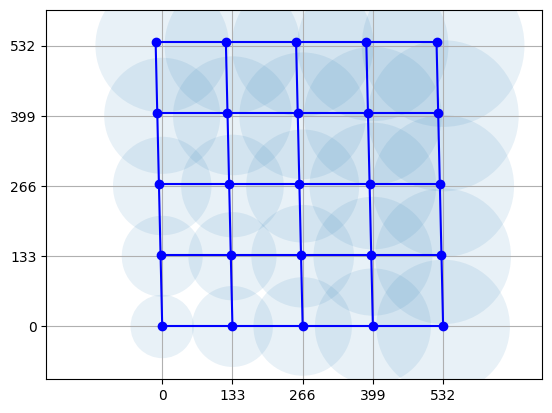

In [46]:
single_grid_plot(mmt_xy.mmt_dev.T, 50000);

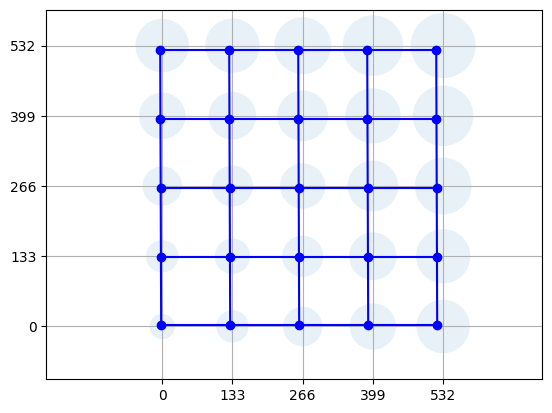

In [25]:
single_grid_plot(mmt_xy.cmm_dev.T, 20000);